# Dask graph computation

Here we illustrate Dask graph for computation, the lazy mode, and parrallelism with distributed

In [1]:
import dask.array as da

## Graph for chunk of operation

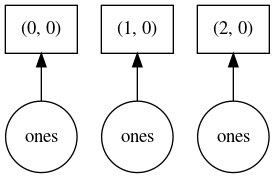

In [2]:
x = da.ones((6, 1), chunks=(2, 1))
x.visualize()

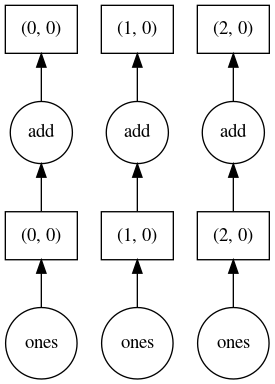

In [3]:
y = 2 + da.ones((6, 1), chunks=(2,1))
y.visualize()

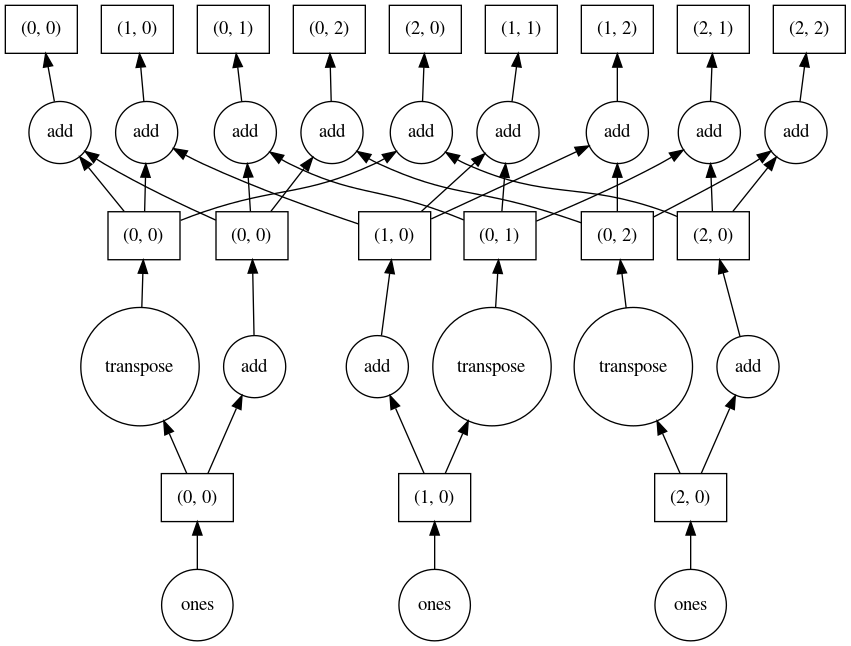

In [4]:
z = x.T+y
z.visualize()

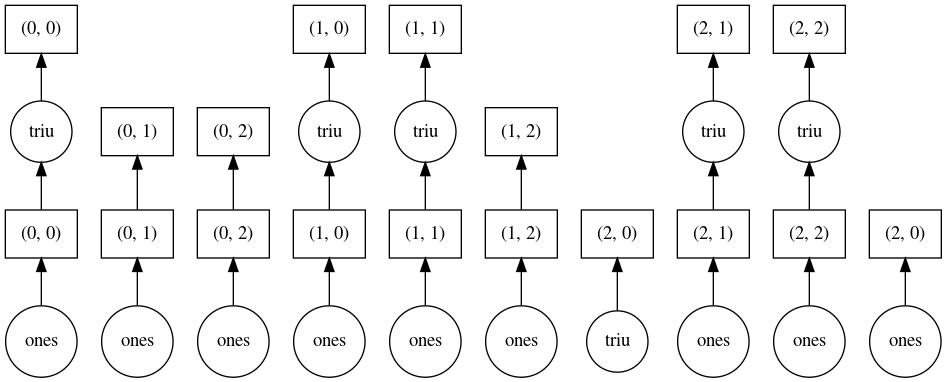

In [5]:
x = da.triu(da.ones((3, 3), chunks=(1, 1)))
x.visualize()

In [6]:
print("Compare this print of x:")
print(x)
print("\nWith this one:")
print(x.compute())

Compare this print of x:
dask.array<triu, shape=(3, 3), dtype=float64, chunksize=(1, 1)>

With this one:
[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


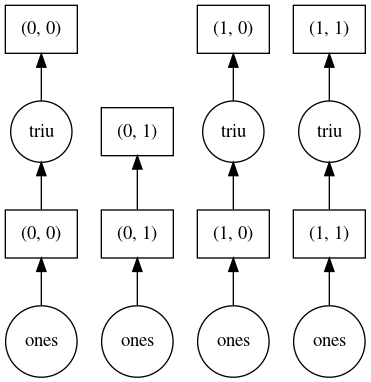

In [7]:
x = da.triu(da.ones((4, 4), chunks=(2, 2)))
x.visualize()

## Graph for lazy operations

See here https://github.com/dask/dask-examples/blob/master/delayed.ipynb for more

In [8]:
# Init dummy functions
import time
import random

def inc(x):
    time.sleep(2)
    return x + 1

def dec(x):
    time.sleep(3)
    return x - 1
    
def add(x, y):
    time.sleep(1)
    return x + y

In [9]:
%%time
# Bench these sequential list of function calls:
x = inc(1) # Return 1 + 1 = 2
y = dec(2) # Return 2 - 1 = 1
z = add(x, y) # Return 2 + 1 = 3
print("z =",z,"\n")

z = 3 

CPU times: user 4 ms, sys: 5 ms, total: 9 ms
Wall time: 6.01 s


note that the x and y computations are performed sequentially, hence the 6sec of wall time

In [10]:
# Make these functions to be "lazy", so that they are executed only when needed:
import dask
inc = dask.delayed(inc)
dec = dask.delayed(dec)
add = dask.delayed(add)

In [11]:
%%time
# Bench the same sequential list of function calls, but let Dask decide if they should be computed or not ("lazy" mode):
x = inc(1)
y = dec(2)
z = add(x, y)
print("z =",z,"\n")

z = Delayed('add-8daaf9e5-0c24-4612-bee6-ed94e53747d9') 

CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 763 µs


see:

- that `z` is now a `delayed` Dask object, the result (3) is not returned
- how the wall time is much shorter, that's because the computation was not performed, only the graph was built

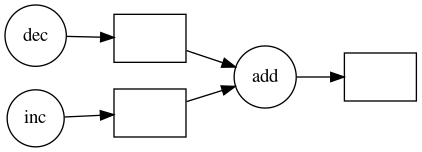

In [12]:
# This is the graph:
z.visualize(rankdir='LR')

In [13]:
%%time
# In order to realy get the computation done, simple call "compute":
print("z =",z.compute(),"\n")

z = 3 

CPU times: user 8 ms, sys: 3 ms, total: 11 ms
Wall time: 4.01 s


## Lazy operations in parrallel with distributed

In [14]:
from dask.distributed import Client
# Fire-up a cluster using the jupyterlab dask extension to your left and insert the appropriate port below:
client = Client("tcp://127.0.0.1:39281", processes=False)
client

Client Scheduler: tcp://127.0.0.1:39281 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 2 Memory: 4.22 GB


In [15]:
%%time
print("z =",z.compute(),"\n")

z = 3 

CPU times: user 21 ms, sys: 4 ms, total: 25 ms
Wall time: 4.05 s


Here the point it to look at the Dask distributed dashboard